# Naive Bayes: Spam or Ham 
```
- Dataset
    Download the sample dataset in CSV format containing two columns:
        Message: The email text content.
        Label: The classification of the email as either Spam or Ham.
    You can download a prepared dataset attached from the GClass.
    Alternatively, you can manually create your own dataset in Jupyter Notebook.
- Data Loading
    Import and load the dataset into your Jupyter Notebook file.
    There are two files: TrainingData and the TestingData. Your program should predict the probabilities of the TrainingData and test the analysison the TestingData
- Data Preprocessing
    Use CountVectorizer or any other text preprocessing library to convert the email messages into numerical features.
- Implementation
    Split the data into training and testing sets.
    Implement a Naive Bayes classifier to train the model on the dataset.
    Evaluate the model using accuracy metrics and classification reports using your formula.
- Visualization
    Create an optional visualization of word frequency in spam versus ham messages if desired.
- Prediction
    Test the model with new email messages (e.g., "Win a free prize now!" or "Meeting tomorrow at 10 AM").
    Print the predicted labels for the test messages.
```

In [3]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.metrics import accuracy_score

# feature engineering
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

In [4]:
# read utf-8 csv file
df_train = pd.read_csv('train.csv', encoding='latin1')

## Data Preparation

In [5]:
df_train.isnull().any()

label      False
message    False
dtype: bool

*No missing values*

In [6]:
df_train.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
# convert ham/spam to 0/1
df_train['label'] = df_train['label'].map({'ham': 0,  'spam': 1})

#### Check the balance of the dataset

In [8]:
df_train['label'].value_counts(normalize=True)

label
0    0.866923
1    0.133077
Name: proportion, dtype: float64

In [9]:
df_train['label'].value_counts()

label
0    3381
1     519
Name: count, dtype: int64

**Note**: We have an unbalanced dataset!

### Preprocessing features

In [10]:
# convert text to lowercase for consistency
df_train['message'] = df_train['message'].str.lower()

## Looking into the data

#### Checking email length for spam/ham

In [11]:
def get_email_length(msg):
    return len(msg)

In [12]:
# get average length of ham emails
df_train['length'] = df_train[df_train['label'] == 0]['message'].apply(get_email_length)
df_train['length'].sum() / len(df_train[df_train['label'] == 0])

np.float64(71.19195504288672)

In [13]:
# get average length of spam emails
df_train['length'] = df_train[df_train['label'] == 1]['message'].apply(get_email_length)
df_train['length'].sum() / len(df_train[df_train['label'] == 1])

np.float64(139.35452793834295)

This is quite insightful. It is a conventional fact that spam messages are usually longer in length.

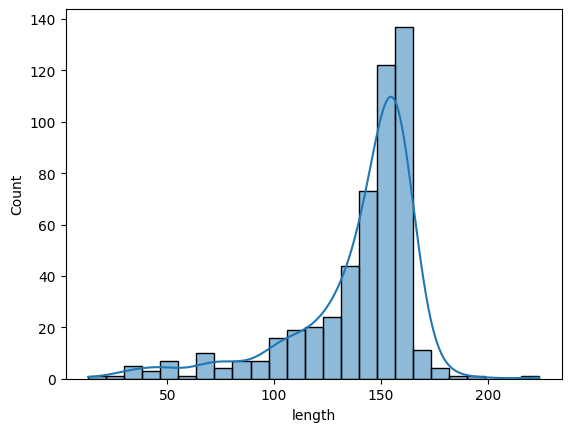

In [14]:
sns.histplot(df_train[df_train['label'] == 1]['length'], bins=25, kde=True);

## Data Splitting

In [15]:
# copy of df_train
df = df_train.copy()
del df['length'] # remove length from the copy

# split to train and validation
X_train, X_val, y_train, y_val = train_test_split(df, df['label'].values, test_size=0.2, random_state=42)

# reset index just to keep it organized
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

In [16]:
# must be equal length
assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

## Feature Engineering

In [17]:
# transform text to a machine readable format using CountVectorizer
stop_words = ['is', 'the', 'a', 'on', 'an', 'in'] # some stop words just because
cv = CountVectorizer(stop_words=stop_words)
X = cv.fit_transform(X_train['message'].values)

In [18]:
# check words
sorted(cv.vocabulary_.items(), key=lambda val:val[1], reverse=True)

[('ûò', 6455),
 ('ûïharry', 6454),
 ('ûï', 6453),
 ('ûªve', 6452),
 ('ûªt', 6451),
 ('ûªm', 6450),
 ('û_', 6449),
 ('ìï', 6448),
 ('ì¼1', 6447),
 ('ì_', 6446),
 ('åôrents', 6445),
 ('åòharry', 6444),
 ('zyada', 6443),
 ('zouk', 6442),
 ('zogtorius', 6441),
 ('zindgi', 6440),
 ('zhong', 6439),
 ('zed', 6438),
 ('zaher', 6437),
 ('zac', 6436),
 ('yup', 6435),
 ('yuou', 6434),
 ('yuo', 6433),
 ('yunny', 6432),
 ('yun', 6431),
 ('yummy', 6430),
 ('yummmm', 6429),
 ('ything', 6428),
 ('ystrday', 6427),
 ('yrs', 6426),
 ('yr', 6425),
 ('yoyyooo', 6424),
 ('youwanna', 6423),
 ('youuuuu', 6422),
 ('yourself', 6421),
 ('yours', 6420),
 ('yourjob', 6419),
 ('yourinclusive', 6418),
 ('youre', 6417),
 ('your', 6416),
 ('youphone', 6415),
 ('you', 6414),
 ('yor', 6413),
 ('yogasana', 6412),
 ('yoga', 6411),
 ('yo', 6410),
 ('ymca', 6409),
 ('ym', 6408),
 ('yijue', 6407),
 ('yifeng', 6406),
 ('yi', 6405),
 ('yhl', 6404),
 ('yetunde', 6403),
 ('yetty', 6402),
 ('yet', 6401),
 ('yesterday', 6400),
 ('

#### Verifying transformation

In [25]:
sample = X_train.iloc[0]
x = cv.transform([sample['message']])

In [33]:
sample

label                                    0
message    kallis wont bat in 2nd innings.
Name: 0, dtype: object

In [38]:
print(np.array(x))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 6456)>
  Coords	Values
  (0, 319)	1
  (0, 993)	1
  (0, 3031)	1
  (0, 3215)	1
  (0, 6299)	1


In [49]:
X_spam = X[X_train['label'] == 1]
X_ham = X[X_train['label'] == 0]

In [51]:
# sum of classes
spam_word_counts = np.array(X_spam.sum(axis=0)).flatten()
ham_word_counts = np.array(X_ham.sum(axis=0)).flatten()

# total words
total_spam_words = spam_word_counts.sum()
total_ham_words = ham_word_counts.sum()

In [56]:
vocab_size = len(cv.vocabulary_)